<a href="https://colab.research.google.com/github/DakshitChopra/FakeNews_Detection/blob/main/FakeNews_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import torch
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.text import *
from fastai.text.all import *
from fastai.metrics import error_rate, accuracy
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = Path('../content')
path.ls()

(#3) [Path('../content/.config'),Path('../content/news_dataset.csv'),Path('../content/sample_data')]

In [5]:
df = pd.read_csv(path/'news_dataset.csv')
df.head()

,label,text
0,REAL,"Payal has accused filmmaker Anurag Kashyap of behaving inappropriately with her in a video that went viral. She maintained her stance while speaking to ETimes and said, “I have wanted to speak about this for a long time. But today, finally I thought I must get it off my head. I had tweeted about my incident sometime ago when the #MeToo movement had happened, but many people told me to delete the tweet else I would stop getting work. My manager too advised me to remove the tweet. I complied. Post that, Anurag blocked me on WhatsApp.”"
1,FAKE,"A four-minute-long video of a woman criticising the government at an anti-Citizenship Amendment Act rally in Delhi earlier in January is going viral with a false claim that the woman shows late Prime Minister Atal Bihari Vajpayee's niece.\n\nThe caption in Hindi translates to: "" Respected Vajpayee ji's niece has finally broken her silence, listen to what she has to say.""\n\n\n\n(Translated from Hindi: माननीय वाजपयी जी की भतीजी ने आखिरकार तोड़ी चुप्पी | जानिए क्या कहा)\n\nAlso Read: Muslim Politician Disguised As A Hindu In Anti-CAA Protests?\n\nThe video comes at a time when protests again..."
2,FAKE,"Republic Poll, a fake Twitter account imitating the Arnab Goswami-led Republic TV, is angering netizens with its controversial polls as Twitter users including journalists mistake it for the channel's official account.\n\n\n\nThe fake account (@RepublicPoll) uses a logo very similar to Republic TV's logo and does not mention in its bio whether it is related to Republic TV or if it is a fan account. Twitter's rules require that a fan account or parody account should indicate the same.\n\nAlso Read:Did Nita Ambani Ask For Support For CAA?\n\n\n\n\n\nSiddharth Varadarajan, founding editor of ..."
3,REAL,"Delhi teen finds place on UN green list, turns glass into sand\n\nNEW DELHI: Udit Singhal , who founded a startup to turn glass bottles into sand , has been named among 17 people in the United Nation’s 2020 Class of Young Leaders for Sustainable Development Goals (SDGs). The programme is a flagship initiative that recognises the efforts of young people in driving action and galvanising others in support of UN’s 2030 agenda for sustainable development.Singhal, an 18-year-old who lives near Mandi House, told TOI, “I feel proud to represent India. Along with 16 others, I’ll work to motivate y..."
4,REAL,"Delhi: A high-level meeting underway at residence of Rajya Sabha Chairman, Venkaiah Naidu, over the ruckus created… https://t.co/OfoRpOwd4b — ANI (@ANI) 1600599438000\n\nA watershed moment in the history of Indian agriculture! Congratulations to our hardworking farmers on the passage… https://t.co/CdLW6Itzmc — Narendra Modi (@narendramodi) 1600595449000\n\nFor decades, the Indian farmer was bound by various constraints and bullied by middlemen. The bills passed by Parli… https://t.co/GfF1nhaFeZ — Narendra Modi (@narendramodi) 1600595492000\n\nOur agriculture sector is in desperate need of ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3729 non-null   object
 1   text    3721 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


In [7]:
df.describe()

,label,text
count,3729,3721
unique,2,2229
top,FAKE,Highest IPL score in Dubai\n\nMilestones to watch out for:\n\nPreview\n\nLeaving things to chance is not what #CaptainPunjab does... he creates chances! 💪🏻#SaddaPunjab #Dream11IPL… https://t.co/2hJH7DXcWb — Kings XI Punjab (@lionsdenkxip) 1600593907000\n\nSunrisers Hyderabad 184/1 vs Delhi Daredevils (now Delhi Capitals ) in 2014Chris Gayle need 16 more runs to get to 4500-run mark in the IPL KL Rahul needs 23 more to complete 2000 IPL runsAmit Mishra needs 3 more scalps and to complete 100 wickets for Delhi Capitals Rishabh Pant needs 6 more maximums to complete 100 IPL sixesHere's KL Rah...
freq,1877,79


In [8]:
dls = TextDataLoaders.from_df(df, path=path, valid_pct=0.2, text_col=1, label_col=0, tok_text_col='text', seq_len=72, bs=64)

In [9]:
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxup we xxup support xxup narendra xxup modi ' , a public xxmaj facebook group created over seven years ago has morphed into a fake news farm with over 2.9 million members and a few moderators who in turn feed their own disinformation networks . \n\n xxmaj at the time of writing this story , the group had about xxunk lakh members ( xxunk ) and counting . \n\n xxmaj furthermore , nearly 600 xxmaj facebook pages are also ' members ' of the group , amplifying the group 's posts that are heavily xxunk towards the right - wing and are increasingly fake . \n\n xxunk pages are also members of the group \n\n xxmaj in the week beginning xxmaj april 8 , 2019 xxup boom debunked several pieces of misinformation ranging from a fake quote , a photoshopped tweet , an unrelated image and an unrelated video",FAKE
1,"xxbos xxmaj no significant mutation of xxmaj coronavirus in xxmaj india , says xxmaj harsh xxmaj vardhan xxmaj no significant or drastic mutation in strains of sars - cov-2 has been found in xxmaj india till now , xxmaj union minister xxmaj harsh xxmaj vardhan said on xxmaj sunday . xxmaj he also said the xxup icmr has been conducting large - scale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early xxmaj october . \n\n xxmaj india 's xxmaj covid-19 case tally crossed 54 - lakh mark with a spike of 92,605 new cases and 1,133 deaths in the last 24 hours , according to the xxmaj union ministry of health . xxmaj the total case tally stands at 54,00,620 including 10,10,824 active cases , 43,03,044 cured / discharged / migrated and 86,752 deaths ,",REAL
2,"xxbos xxmaj no significant mutation of xxmaj coronavirus in xxmaj india , says xxmaj harsh xxmaj vardhan xxmaj no significant or drastic mutation in strains of sars - cov-2 has been found in xxmaj india till now , xxmaj union minister xxmaj harsh xxmaj vardhan said on xxmaj sunday . xxmaj he also said the xxup icmr has been conducting large - scale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early xxmaj october . \n\n xxmaj india 's xxmaj covid-19 case tally crossed 54 - lakh mark with a spike of 92,605 new cases and 1,133 deaths in the last 24 hours , according to the xxmaj union ministry of health . xxmaj the total case tally stands at 54,00,620 including 10,10,824 active cases , 43,03,044 cured / discharged / migrated and 86,752 deaths ,",REAL


In [10]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=accuracy)

In [11]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.435272,0.134838,0.967785,32:34
1,0.367610,0.061736,0.986577,32:42


epoch,train_loss,valid_loss,accuracy,time
0,0.435272,0.134838,0.967785,32:34
1,0.367610,0.061736,0.986577,32:42
2,0.298432,0.051913,0.991946,32:47


In [12]:
learn.show_results()

,text,category,category_
0,"xxbos xxmaj no significant mutation of xxmaj coronavirus in xxmaj india , says xxmaj harsh xxmaj vardhan xxmaj no significant or drastic mutation in strains of sars - cov-2 has been found in xxmaj india till now , xxmaj union minister xxmaj harsh xxmaj vardhan said on xxmaj sunday . xxmaj he also said the xxup icmr has been conducting large - scale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early xxmaj october . \n\n xxmaj india 's xxmaj covid-19 case tally crossed 54 - lakh mark with a spike of 92,605 new cases and 1,133 deaths in the last 24 hours , according to the xxmaj union ministry of health . xxmaj the total case tally stands at 54,00,620 including 10,10,824 active cases , 43,03,044 cured / discharged / migrated and 86,752 deaths ,",REAL,REAL
1,"xxbos xxmaj no significant mutation of xxmaj coronavirus in xxmaj india , says xxmaj harsh xxmaj vardhan xxmaj no significant or drastic mutation in strains of sars - cov-2 has been found in xxmaj india till now , xxmaj union minister xxmaj harsh xxmaj vardhan said on xxmaj sunday . xxmaj he also said the xxup icmr has been conducting large - scale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early xxmaj october . \n\n xxmaj india 's xxmaj covid-19 case tally crossed 54 - lakh mark with a spike of 92,605 new cases and 1,133 deaths in the last 24 hours , according to the xxmaj union ministry of health . xxmaj the total case tally stands at 54,00,620 including 10,10,824 active cases , 43,03,044 cured / discharged / migrated and 86,752 deaths ,",REAL,REAL
2,"xxbos xxmaj no significant mutation of xxmaj coronavirus in xxmaj india , says xxmaj harsh xxmaj vardhan xxmaj no significant or drastic mutation in strains of sars - cov-2 has been found in xxmaj india till now , xxmaj union minister xxmaj harsh xxmaj vardhan said on xxmaj sunday . xxmaj he also said the xxup icmr has been conducting large - scale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early xxmaj october . \n\n xxmaj india 's xxmaj covid-19 case tally crossed 54 - lakh mark with a spike of 92,605 new cases and 1,133 deaths in the last 24 hours , according to the xxmaj union ministry of health . xxmaj the total case tally stands at 54,00,620 including 10,10,824 active cases , 43,03,044 cured / discharged / migrated and 86,752 deaths ,",REAL,REAL
3,"xxbos xxmaj no significant mutation of xxmaj coronavirus in xxmaj india , says xxmaj harsh xxmaj vardhan xxmaj no significant or drastic mutation in strains of sars - cov-2 has been found in xxmaj india till now , xxmaj union minister xxmaj harsh xxmaj vardhan said on xxmaj sunday . xxmaj he also said the xxup icmr has been conducting large - scale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early xxmaj october . \n\n xxmaj india 's xxmaj covid-19 case tally crossed 54 - lakh mark with a spike of 92,605 new cases and 1,133 deaths in the last 24 hours , according to the xxmaj union ministry of health . xxmaj the total case tally stands at 54,00,620 including 10,10,824 active cases , 43,03,044 cured / discharged / migrated and 86,752 deaths ,",REAL,REAL
4,"xxbos xxmaj no significant mutation of xxmaj coronavirus in xxmaj india , says xxmaj harsh xxmaj vardhan xxmaj no significant or drastic mutation in strains of sars - cov-2 has been found in xxmaj india till now , xxmaj union minister xxmaj harsh xxmaj vardhan said on xxmaj sunday . xxmaj he also said the xxup icmr has been conducting large - scale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early xxmaj octob

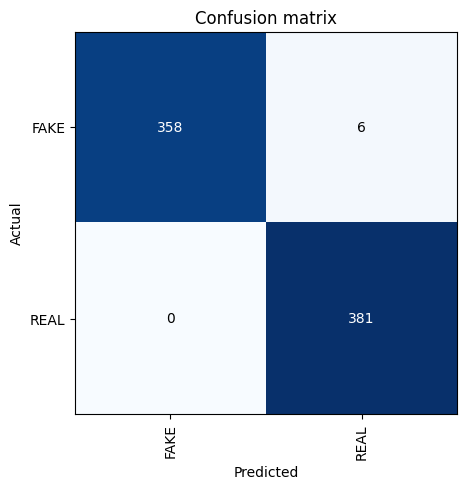

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()